In [6]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()
%matplotlib inline

plt.rcParams['figure.figsize']=(20,5)

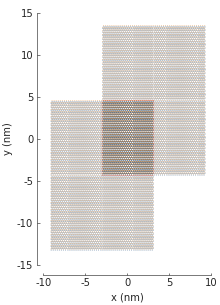

In [7]:
from pybinding.repository import graphene
from math import sqrt, pi

def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

size=50
model = pb.Model(
    #graphene.monolayer(),
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    #vacancy(position=[0, 0], radius=5*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
    #pb.translational_symmetry(a1=True, a2= True)
)
model.plot()


Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
0.1602526307106018


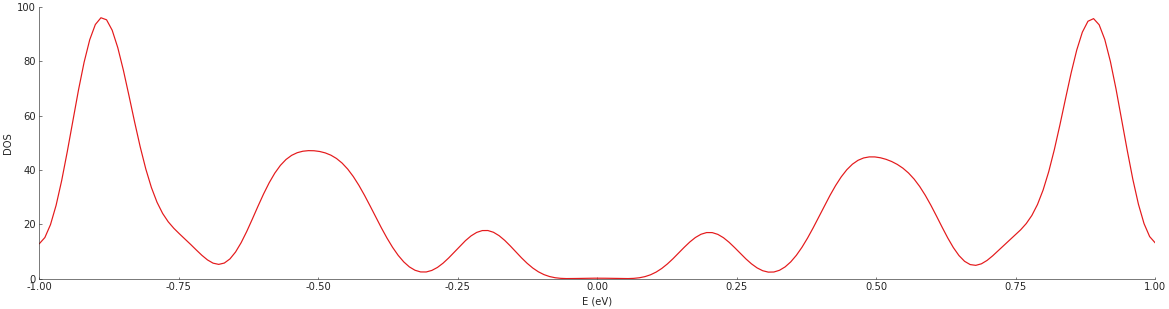

In [8]:
from pybinding.repository import graphene
from math import sqrt, pi

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
dos.plot()
print(dos.data[100])
#plt.ylim(0,250)

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00
27.748777389526367


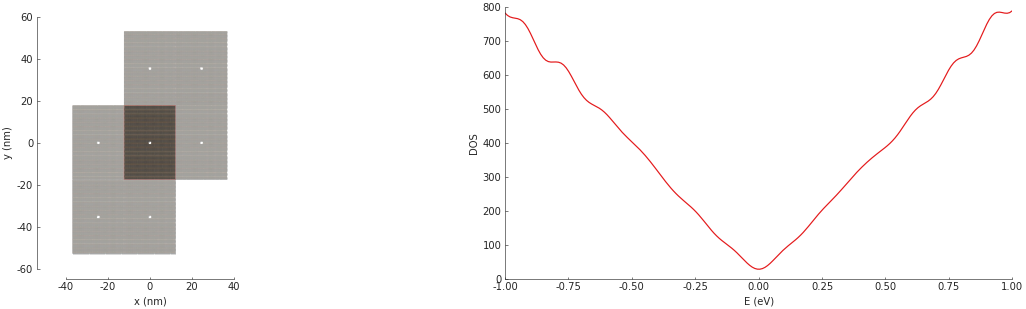

In [9]:
from pybinding.repository import graphene
from math import sqrt, pi

def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

size=200
model = pb.Model(
    #graphene.monolayer(),
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy(position=[0, 0], radius=5*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
    #pb.translational_symmetry(a1=True, a2= True)
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00
57.86262130737305


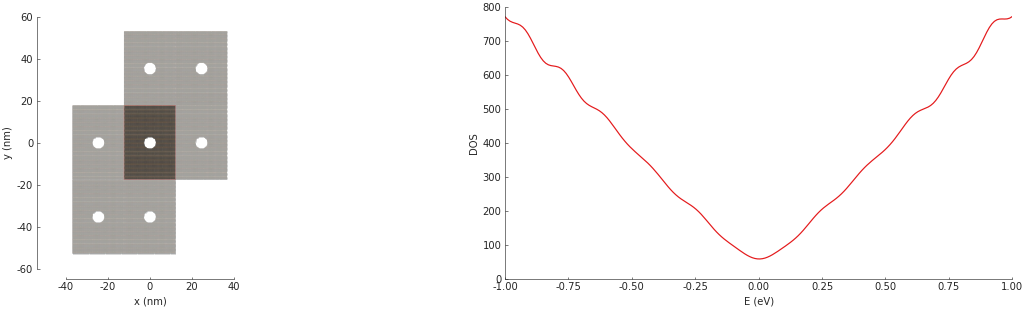

In [10]:
from pybinding.repository import graphene
from math import sqrt, pi

def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy(position=[0, 0], radius=20*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

In [ ]:
from pybinding.repository import graphene
from math import sqrt, pi

def ring_vacancy(position, inner_radius, outer_radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(inner_radius**2< (x-x0)**2 + (y-y0)**2, (x-x0)**2 + (y-y0)**2 < outer_radius**2)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    ring_vacancy([0, 0], 10*graphene.a/sqrt(3), 20*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

In [ ]:
kpm = pb.kpm(model)
ldos = kpm.calc_dos(energy=np.linspace(-9, 9, 200), broadening=0.05)
ldos.plot()
#plt.ylim(0, 25000)